<a href="https://colab.research.google.com/github/AFTAB685/Practice/blob/master/Valassis_Homework_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are a marketing technology company that develops solutions for the digital advertising space (AdTech). This assessment is designed to allow you to showcase your analytical abilities on a simplified version of a problem we usually work on.  You will have an opportunity to walk a couple of the Data Scientists’ through your solution over a video call or possibly in person.

We don't expect this to be a time-intensive exercise for you. At a minimum, we expect you to answer the questions fully and to the best of your ability, with all code and output shown, well formatted, and well documented. You can choose any widely adopted language (Python, R, Julia, ...) and tool (Jupyter notebooks, Rmd, ...) to best showcase your work. However, we do have a preference for Python because it's what we use internally.  Please have any code used to generate solutions or output you think useful in describing your approach ready to present during your presentation.

###<font color='purple'>***Problem Description***</font>
Our company has run a digital advertising campaign for one of our clients, targeting mobile users in there Southeast. The goal of the campaign was to drive conversions -- users clicking through the ad and accepting our client's offer. To execute this campaign, we built an audience of target users based on historical information about the likelihood to convert.

Our campaigns are executed on real-time bidding (RTB) exchanges. Web pages or mobile apps submit bid requests to potential advertisers on these exchanges. If Valassis Digital sees a bid request for a user we want to target on a web page or mobile app we want to serve on, we will submit a bid for that advertising placement. If we submit the highest (or only) bid, we win the placement and serve an ad. Given that we have won and served the ad, a user then has the opportunity to convert.

We'd like you to take a look at the campaign's results to answer two primary questions:

We ran two creatives (distinct ad designs) during the campaign: a baseline creative in line with our client's previous campaigns, and a new creative designed to increase conversions by more prominently displaying the offer to the user.  To do this, we assigned some users to a "test" group that received the new ad during the campaign.  <font color='purple'>**Did the new creative increase conversions?**</font>
We are equally likely to bid on any user at any time during a campaign.  Other advertisers have found success by "retargeting" users -- increasing the likelihood of a bid for users that have previously landed on a page or actually converted in the past (e.g. redeeming a digital coupon). <font color='purple'>**Would retargeting have improved performance for this campaign?**</font>

###<font color='purple'>***Data***</font>

There are two files available at this link for download.  These files are as follows:

<font color='purple'>**1. user_attributes.csv.gz**</font> is a compressed CSV file of target users' attributes

 *  <font color='purple'>***user_id***</font> is a unique identifier for each user

* <font color='purple'>***attributes***</font> is a text blob of the user's attributes

* <font color='purple'>***age***</font> is the user's age in years

* <font color='purple'>***gender***</font> is the user's inferred gender

* <font color='purple'>***location***</font> is the user's state of residence

* <font color='purple'>***test***</font> is a binary variable indicating that the user belongs to the test group

<font color='purple'>**2. bid_requests.csv.gz**</font> is a compressed CSV file of bid requests that we have seen for the targeted users. Each row represents one (bid) request.

* <font color='purple'>***timestamp***</font> is the time the bid request was received. This is unique for each request and can be treated as a unique key.

* <font color='purple'>***user_id***</font> is the unique identifier for user the request is for
bid is a binary variable indicating whether we made a bid for this request
win is a binary variable indicating whether we submitted the winning bid and served an ad

* <font color='purple'>***conversion***</font> is a binary variable indicating whether the user converted after seeing the ad

###<font color='purple'> ***Exercises / Questions***</font>

1. What do the different distributions of requests by user tell us?
Please describe the distributions related to requests and the users we targeted.

2. Based on insights from #1, was the test effective?
Were test users more likely to convert than control users?

3. Should we consider retargeting users that have previously converted?
Would retargeting users in this campaign have improved performance?





#<font color='Magenta'> ***Answers***</font>

<font color='purple'>1. What do the different distributions of requests by user tell us? Please describe the distributions related to requests and the users we targeted.</font>

It seems that New Ad campagn had a higher conversion rate among females under the age of 25 years old. 

<font color='purple'>2. Based on insights from #1, was the test effective? Were test users more likely to convert than control users?</font>

While visual plots show an increase in conversions in New Ad campaign compared to the Baseline, t-testing on the whole baseline data vs test data showed that it was not statistically significant. The problem was the large group selection, which shouldn't be done with t-testing. It is better to do t-test on smaller groups. When tests were separately examined for each state, it showed that the increased conversions in New Ad compaign were statistically significant in all states except Lousiana and South Carolina. 

<font color='purple'>3. Should we consider retargeting users that have previously converted? Would retargeting users in this campaign have improved performance?</font>

It is difficult to answer this question since no monetary value has been given. A basic classification has been constructed for retargeting based on: 

* Time duration between the visitor's first visit to the website and the time they stop seeing retargeting ads. 
* Time frequency with which visitors see particular ads. 
* Customers who already converted. 

Further investigation will take additional hours and can be done on: 

* Time duration between the visitor's website visit and when they get to see the first ad. 
*  Numerical modeling prediction on retargeting performance. 

A model for conversion prediction is constructed. This model possibly could give a better view whether retargeting will improve performance or not. 




##<font color='purple'>1. Set up data connection</font>
##<font color='purple'>-----------------------------------------------------------------------------------------------------------------------------------------</font>

In [ ]:
#Block warnings to provide more presentable notebook 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mount Google Drive with all Data to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Check the path to make sure that all csv files are unzipped and available
!ls '/content/drive/My Drive/Valassis/'

'Analytical Exercise 06-07-19.docx'   bid_requests.csv	 user_attributes.csv


##<font color='purple'>2. Import Python packages</font>
##<font color='purple'>-----------------------------------------------------------------------------------------------------------------------------------------</font>

In [ ]:
!pip install squarify
!pip install chart-studio
!sudo pip install imbalanced-learn

     |████████████████████████████████| 71kB 2.4MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import timedelta
import json
import squarify
sns.set(color_codes = True)
#from matplotlib import style
#style.use('dark_background')
%matplotlib inline
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.figure_factory as ff
from numpy import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

##<font color='purple'>3. Load csv files, parse json columns and merge all tables</font>
##<font color='purple'>-----------------------------------------------------------------------------------------------------------------------------------------</font>

In [ ]:
# Load the csv file with User Attributes into Pandas
user_attributes = pd.read_csv('/content/drive/My Drive/Valassis/user_attributes.csv')

In [ ]:
# Check first five rows of the User Attributs Table
user_attributes.head()

,user_id,attributes
0,00003e3b9e5336685200ae85d21b4f5e,"{""age"": 33, ""gender"": ""F"", ""location"": ""FL"", ""..."
1,000053b1e684c9e7ea73727b2238ce18,"{""age"": 26, ""gender"": ""M"", ""location"": ""AL"", ""..."
2,00029153d12ae1c9abe59c17ff2e0895,"{""age"": 29, ""gender"": ""F"", ""location"": ""AR"", ""..."
3,0002ac0d783338cfeab0b2bdbd872cda,"{""age"": 29, ""gender"": ""M"", ""location"": ""SC"", ""..."
4,0004d0b59e19461ff126e3a08a814c33,"{""age"": 27, ""gender"": ""F"", ""location"": ""AR"", ""..."


In [ ]:
# Split json string in attributes into a separate dataframe with four separate columns: age, gender, location and test

attributes = user_attributes.attributes.apply(json.loads) \
       .apply(pd.io.json.json_normalize)\
       .pipe(lambda x: pd.concat(x.values))

attributes.head()

,age,gender,location,test
0,33,F,FL,1
0,26,M,AL,1
0,29,F,AR,1
0,29,M,SC,0
0,27,F,AR,1


In [ ]:
# Combine user_id with parsed json attributes columns into one main table. Reset indexes first in both tables since they are different.  

user_attributes.reset_index(drop=True, inplace=True)
attributes.reset_index(drop=True, inplace=True)

uatt = pd.concat([user_attributes['user_id'],attributes], axis=1)
uatt.head()

,user_id,age,gender,location,test
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1
1,000053b1e684c9e7ea73727b2238ce18,26,M,AL,1
2,00029153d12ae1c9abe59c17ff2e0895,29,F,AR,1
3,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0
4,0004d0b59e19461ff126e3a08a814c33,27,F,AR,1


In [ ]:
# Load the csv file with User Attributes into Pandas
bid_requests = pd.read_csv('/content/drive/My Drive/Valassis/bid_requests.csv')

In [ ]:
# Check first five rows of the User Attributs Table
bid_requests.head()

,timestamp,user_id,bid,win,conversion
0,2017-01-01 00:00:01,be7485be5b6eb3690efcbc9e95e8f15a,0,0,0
1,2017-01-01 00:00:02,26c5dca2512a4c7fe8810bd04191b1b3,0,0,0
2,2017-01-01 00:00:05,2121376a323507c01c5e92c39ae8ccd4,0,0,0
3,2017-01-01 00:00:12,fa6a0925d911185338b0acc93c66dc92,0,0,0
4,2017-01-01 00:00:13,4299f209da83da82b711f1d631cc607b,1,0,0


In [ ]:
# Merge user_id table with bid_requests table 
data = uatt.merge(bid_requests, on='user_id')
data.head()

,user_id,age,gender,location,test,timestamp,bid,win,conversion
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-01 13:43:34,1,0,0
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 03:59:18,0,0,0
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 17:41:50,1,1,0
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-07 04:02:42,1,1,0
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-08 09:05:01,1,0,0


In [ ]:
# Convert timestamp from object to datetime format 

data['timestamp'] = pd.to_datetime(data['timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     600000 non-null  object        
 1   age         600000 non-null  int64         
 2   gender      600000 non-null  object        
 3   location    600000 non-null  object        
 4   test        600000 non-null  int64         
 5   timestamp   600000 non-null  datetime64[ns]
 6   bid         600000 non-null  int64         
 7   win         600000 non-null  int64         
 8   conversion  600000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 45.8+ MB


In [ ]:
# add age bins to the data for easier grouping later
data['age_bins'] = pd.cut(x=data['age'], bins=[17, 21, 25, 29, 33])
display(data.head())

,user_id,age,gender,location,test,timestamp,bid,win,conversion,age_bins
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-01 13:43:34,1,0,0,"(29, 33]"
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 03:59:18,0,0,0,"(29, 33]"
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 17:41:50,1,1,0,"(29, 33]"
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-07 04:02:42,1,1,0,"(29, 33]"
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-08 09:05:01,1,0,0,"(29, 33]"


<font color='purple'>Calculate average conversions per customer.Divide data into test and baseline. Sort customers based on recency and frequency. To calculate recency, take on day after the last invoice date of the data set at the snapshot date. The date difference will show how recent the last conversion was made.
RFM clustering stands for Recency-Frequency-Monetary value is a common customer segmentation method. No monetary value is given here, and hence we will calculate only Recency and Frequency and select the customers with conversion history. Hence we modify the method and call it RFC for Recency, Frequency and Conversion. </font>

In [ ]:
#Break data into two categories: Base and New Ad to analyze them separately

data_test = data[data['test'] == 1].reset_index(drop=True)
display(data_test.head())
display(data_test.shape)

data_base = data[data['test'] == 0].reset_index(drop=True)
display(data_base.head())
display(data_base.shape)


,user_id,age,gender,location,test,timestamp,bid,win,conversion,age_bins
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-01 13:43:34,1,0,0,"(29, 33]"
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 03:59:18,0,0,0,"(29, 33]"
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 17:41:50,1,1,0,"(29, 33]"
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-07 04:02:42,1,1,0,"(29, 33]"
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-08 09:05:01,1,0,0,"(29, 33]"


(337893, 10)

,user_id,age,gender,location,test,timestamp,bid,win,conversion,age_bins
0,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-08 00:30:17,0,0,0,"(25, 29]"
1,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-09 21:17:16,0,0,0,"(25, 29]"
2,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-13 06:12:09,0,0,0,"(25, 29]"
3,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-14 03:37:56,1,0,0,"(25, 29]"
4,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-15 06:12:19,0,0,0,"(25, 29]"


(262107, 10)

In [ ]:
# Initial data process table for Base data 

# Create snapshot date
snapshot_date = data_base['timestamp'].max() + timedelta(hours=8)
display(snapshot_date)

# Grouping by user id 
data_process_base = data_base.groupby(['user_id']).agg({'timestamp': lambda x: (snapshot_date - x.max()).days,
                                             'win': 'sum',
                                              'conversion': 'sum'})
# Rename the columns 
data_process_base.rename(columns={'timestamp': 'Recency',
                         'win': 'Frequency',
                         'conversion': 'Conversion Frequency'}, inplace=True)                                            

display(data_process_base.head())
display('{:,} rows; {:,} columns'
      .format(data_process_base.shape[0], data_process_base.shape[1]))


Timestamp('2017-01-23 21:19:09')

,Recency,Frequency,Conversion Frequency
user_id,,,
0002ac0d783338cfeab0b2bdbd872cda,3,0,0
00063cb5da1826febf178b669eea3250,1,4,0
0006aabe0ba47a35c0b0bf6596f85159,0,3,0
0007789b118e4710fc0e7c8758a6532a,0,2,0
000c076c390a4c357313fca29e390ece,16,0,0


'27,608 rows; 3 columns'

In [ ]:
# Initial data process table for Test data 

# Create snapshot date
snapshot_date = data_test['timestamp'].max() + timedelta(hours=8)
display(snapshot_date)

# Groping by user id 
data_process_test = data_test.groupby(['user_id']).agg({'timestamp': lambda x: (snapshot_date - x.max()).days,
                                             'win': 'sum',
                                              'conversion': 'sum'})
# Rename the columns 
data_process_test.rename(columns={'timestamp': 'Recency',
                         'win': 'Frequency',
                         'conversion': 'Conversion Frequency'}, inplace=True)                                            

display(data_process_test.head())
display('{:,} rows; {:,} columns'
      .format(data_process_test.shape[0], data_process_test.shape[1]))

Timestamp('2017-01-23 21:19:28')

,Recency,Frequency,Conversion Frequency
user_id,,,
00003e3b9e5336685200ae85d21b4f5e,6,4,0
000053b1e684c9e7ea73727b2238ce18,8,0,0
00029153d12ae1c9abe59c17ff2e0895,0,0,0
00053f5e11d1fe4e49a221165b39abc9,3,2,0
0006dd05ea1e999ddaa041a7091b7b36,6,0,0


'35,529 rows; 3 columns'

In [ ]:
# Add process table to the main data table for each category: Base and Test

total_data_base = data_base.merge(data_process_base, on='user_id')
display(total_data_base.head())


total_data_test = data_test.merge(data_process_test, on='user_id')
display(total_data_test.head())

,user_id,age,gender,location,test,timestamp,bid,win,conversion,age_bins,Recency,Frequency,Conversion Frequency
0,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-08 00:30:17,0,0,0,"(25, 29]",3,0,0
1,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-09 21:17:16,0,0,0,"(25, 29]",3,0,0
2,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-13 06:12:09,0,0,0,"(25, 29]",3,0,0
3,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-14 03:37:56,1,0,0,"(25, 29]",3,0,0
4,0002ac0d783338cfeab0b2bdbd872cda,29,M,SC,0,2017-01-15 06:12:19,0,0,0,"(25, 29]",3,0,0


,user_id,age,gender,location,test,timestamp,bid,win,conversion,age_bins,Recency,Frequency,Conversion Frequency
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-01 13:43:34,1,0,0,"(29, 33]",6,4,0
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 03:59:18,0,0,0,"(29, 33]",6,4,0
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 17:41:50,1,1,0,"(29, 33]",6,4,0
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-07 04:02:42,1,1,0,"(29, 33]",6,4,0
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-08 09:05:01,1,0,0,"(29, 33]",6,4,0


##<font color='purple'>4. Exploratory Data Analysis</font>
##<font color='purple'>-----------------------------------------------------------------------------------------------------------------------------------------</font>

In [ ]:
for i in list(data_base.columns[data_base.dtypes =='object']):
  print(data_base[i].value_counts(normalize = True)*100)
  print()

fbb43b2b2560e178cd84f7eaf9709740    0.018313
d0fda0cf702231b3963aedb610256146    0.017932
c7d67339105519c3dae1c323022dbd04    0.017550
37e9b839eeb8b2d3c484e37c548dccae    0.017550
796f13adf0167d7019717e1b71291ad7    0.017169
                                      ...   
ddc1ff560673ec24600a5f837f0cb9bd    0.000382
da35a24fb3674802565f8bd5243a94d4    0.000382
673a52f787cc434410519234173933fc    0.000382
a19fbff55f49a023807bfe3ea9a9946e    0.000382
2596a5e119b63ccc73b675925f6aa228    0.000382
Name: user_id, Length: 27608, dtype: float64

M    50.107017
F    49.892983
Name: gender, dtype: float64

AR    11.745966
SC    11.615867
KY    11.449523
VA    11.324383
FL    11.186653
LA    11.012678
GA    10.900129
NC     5.386350
MS     5.286009
AL     5.134926
TN     4.957517
Name: location, dtype: float64



In [ ]:
for i in list(data_test.columns[data_base.dtypes =='object']):
  print(data_test[i].value_counts(normalize = True)*100)
  print()

c270380928379b118113b0e0ce1a3f2f    0.014798
6aa1c1a875889044ebf43dfe844c7bc1    0.013614
ef8f94395be9fd78b7d0aeecf7864a03    0.013022
3c841cee5b2497ea9617f7e630b8ead1    0.013022
f6a4305cef95d570863561961ff7b118    0.012726
                                      ...   
7b4d0bb1ea88165e7da2c307bea11d6e    0.000296
0043b79674f3725261aca28ec94e5fdc    0.000296
3279e1d4c83720ed7e4b99f98b26feb1    0.000296
5fc4698a9539a70b368c5aa9736c49eb    0.000296
dfaf5c7e7dcea4cc0a11e5961b2d6de6    0.000296
Name: user_id, Length: 35529, dtype: float64

F    50.045725
M    49.954275
Name: gender, dtype: float64

TN    12.477027
AL    12.261278
NC    12.123956
MS    11.932180
KY     7.461534
GA     7.415069
LA     7.329243
SC     7.273012
VA     7.267093
FL     7.262358
AR     7.197249
Name: location, dtype: float64



<font color='purple'>Test data has larger percentage of records in TN, AL, NC and MC, which can affect the resulting conversions.</font> 

<font color='purple'>Plot the mean of the dataset for bid request, win and resulted conversion in each state broken by gender and age bin. When there are multiple observations in each category, barplot will bootstrapping to compute a confidence interval around the estimate and plost that using error bars.</font>

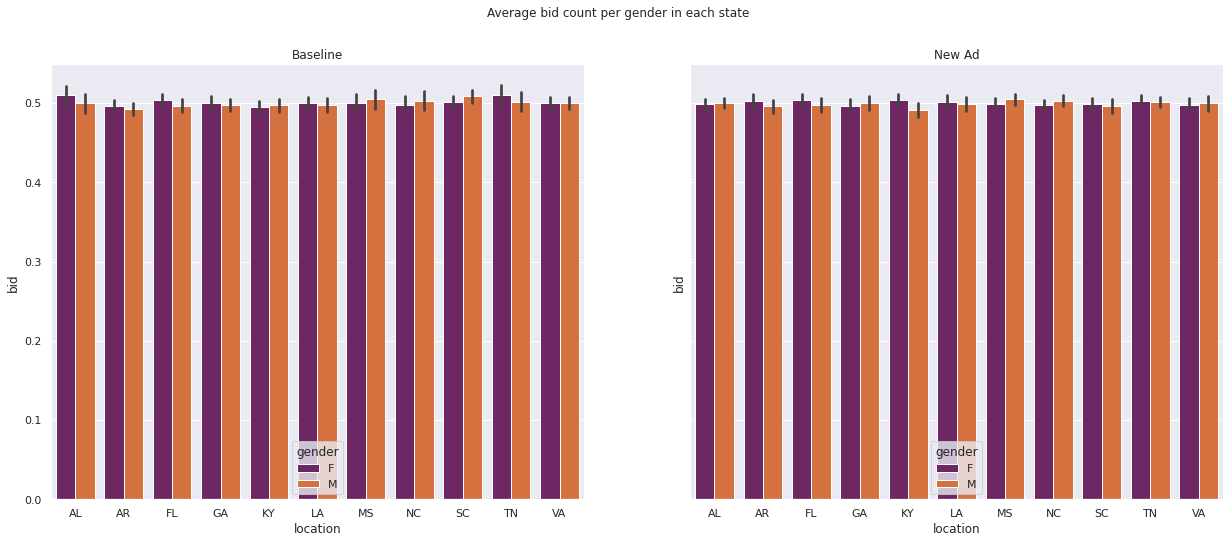

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(21,8), sharey=True)
fig.suptitle('Average bid count per gender in each state')

order_statebin = pd.value_counts(data['location']).sort_index().index

ax1 = sns.barplot(data_test['location'],total_data_test['bid'], hue=data['gender'], order = order_statebin, palette ='inferno', ax=ax[1]).set_title('New Ad');
ax2 = sns.barplot(data_base['location'],total_data_base['bid'], hue=data['gender'], order = order_statebin, palette ='inferno', ax=ax[0]).set_title('Baseline');

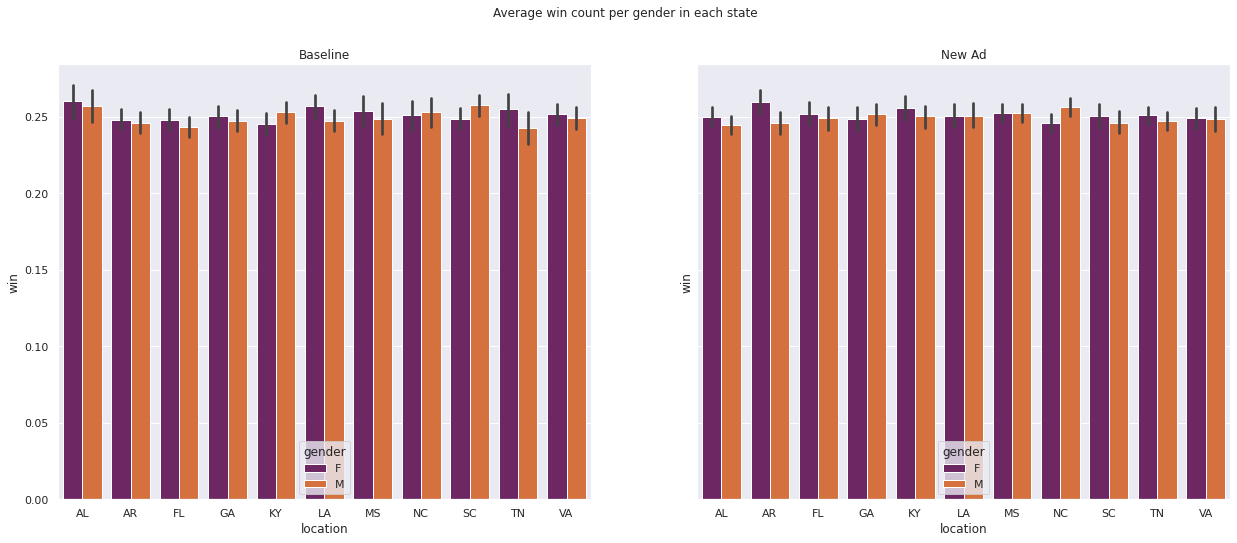

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(21,8), sharey=True)
fig.suptitle('Average win count per gender in each state')

order_statebin = pd.value_counts(data['location']).sort_index().index

ax1 = sns.barplot(data_test['location'],total_data_test['win'], hue=data['gender'], order = order_statebin, palette ='inferno', ax=ax[1]).set_title('New Ad');
ax2 = sns.barplot(data_base['location'],total_data_base['win'], hue=data['gender'], order = order_statebin, palette ='inferno', ax=ax[0]).set_title('Baseline');

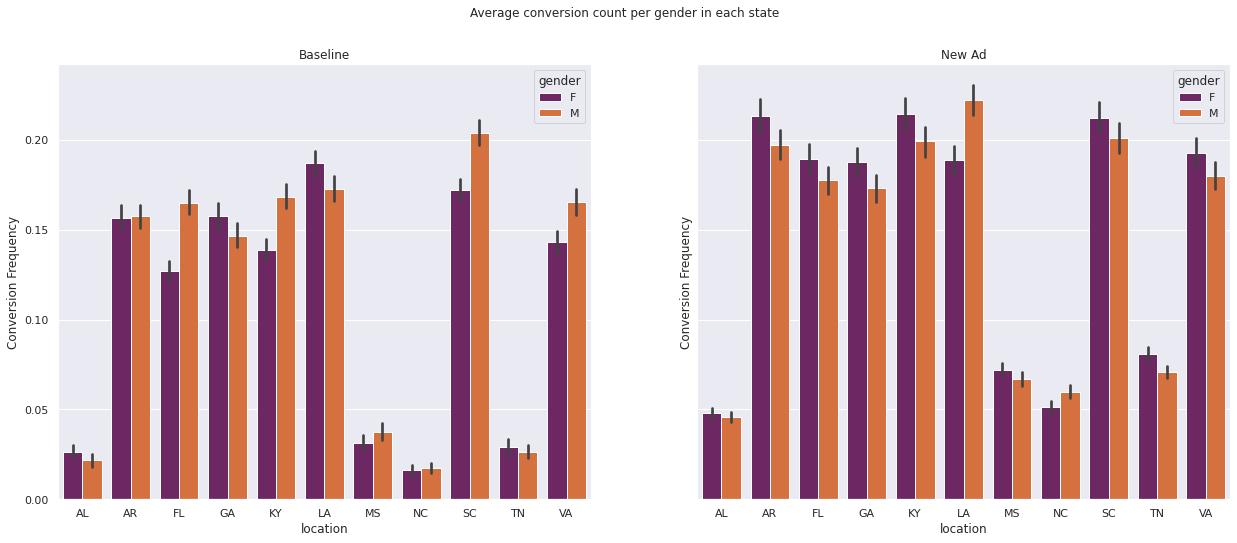

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(21,8), sharey=True)
fig.suptitle('Average conversion count per gender in each state')

order_statebin = pd.value_counts(data['location']).sort_index().index

ax1 = sns.barplot(data_test['location'],total_data_test['Conversion Frequency'], hue=data['gender'], order = order_statebin, palette ='inferno', ax=ax[1]).set_title('New Ad');
ax2 = sns.barplot(data_base['location'],total_data_base['Conversion Frequency'], hue=data['gender'], order = order_statebin, palette ='inferno', ax=ax[0]).set_title('Baseline');


<font color='purple'>Observations from the three pairs of plots above: 
* Bid requests and wins are similar for all data across the baseline and new add campaign. Hence one can compare conversions across each group without normalizing coversion data to bid and win data. Conversion Frequency plot shows that All states benefited from a new add campaign. Arizona, Florida, Georgia, Kentuky, Mississipi, South Carolina, Tennessi and Virginia had a slight increase in female conversion vs male.

Females seem to have higher conversions 
</font>

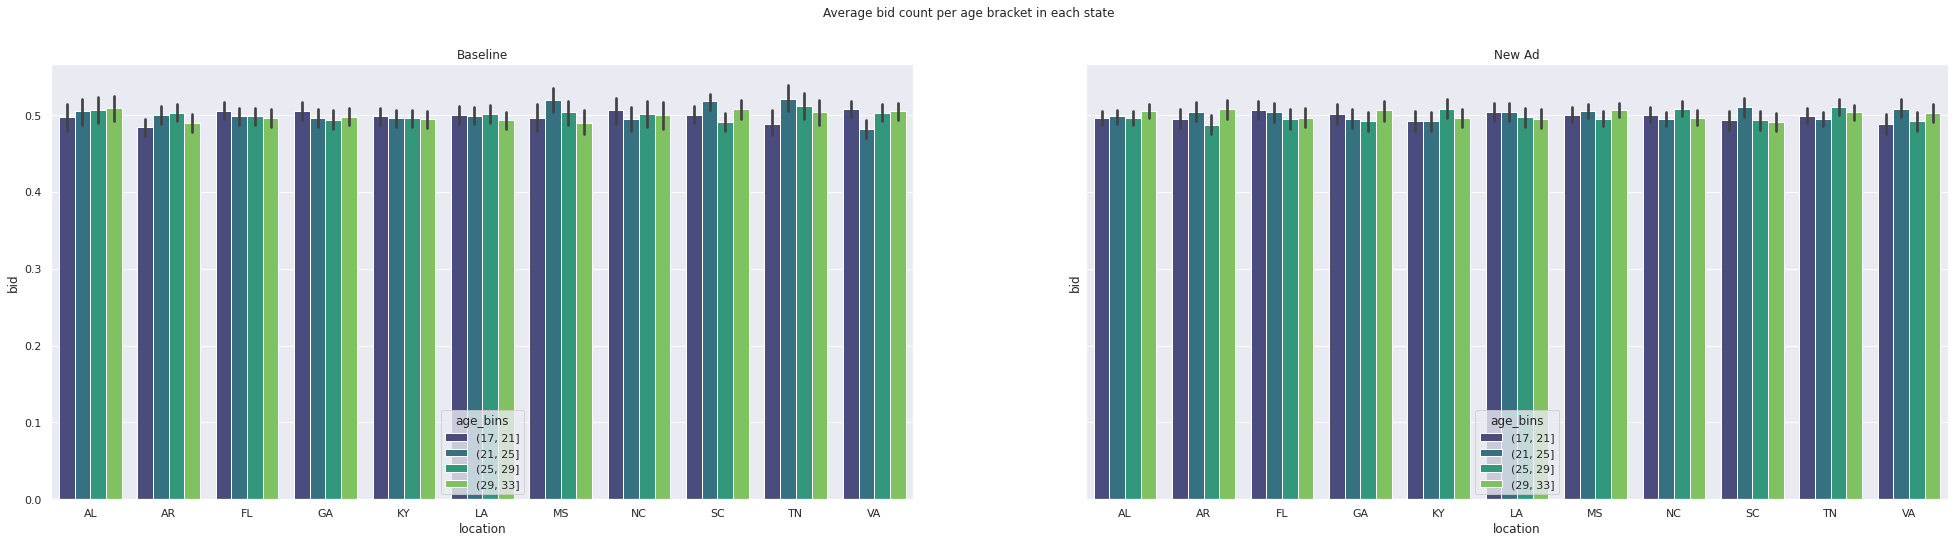

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(34,8),sharey=True)
fig.suptitle('Average bid count per age bracket in each state')

order_statebin = pd.value_counts(data['location']).sort_index().index

ax1 = sns.barplot(data_test['location'],total_data_test['bid'], hue=data['age_bins'], order = order_statebin, palette ='viridis', ax=ax[1]).set_title('New Ad');
ax2 = sns.barplot(data_base['location'],total_data_base['bid'], hue=data['age_bins'], order = order_statebin, palette ='viridis', ax=ax[0]).set_title('Baseline');

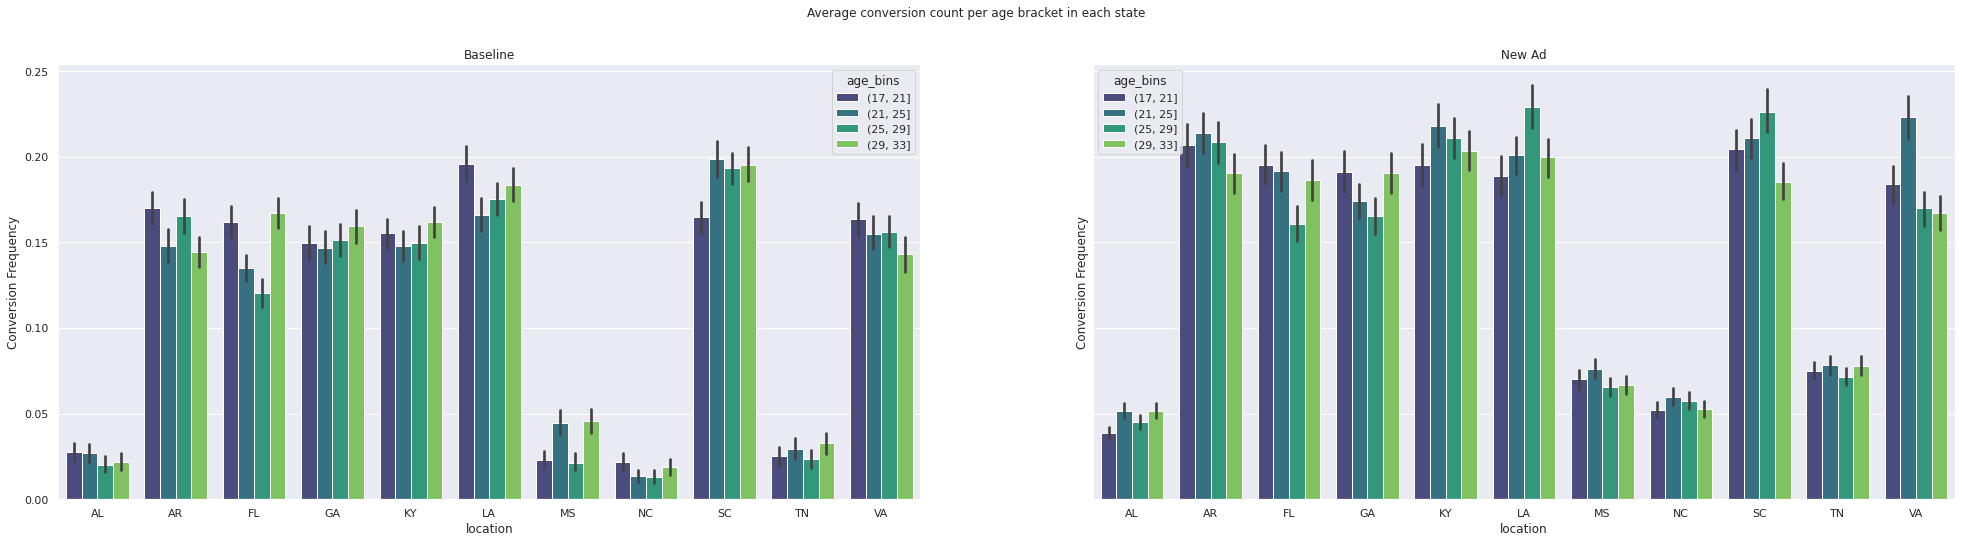

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(34,8),sharey=True)
fig.suptitle('Average conversion count per age bracket in each state')

order_statebin = pd.value_counts(data['location']).sort_index().index

ax1 = sns.barplot(data_test['location'],total_data_test['Conversion Frequency'], hue=data['age_bins'], order = order_statebin, palette ='viridis', ax=ax[1]).set_title('New Ad');
ax2 = sns.barplot(data_base['location'],total_data_base['Conversion Frequency'], hue=data['age_bins'], order = order_statebin, palette ='viridis', ax=ax[0]).set_title('Baseline');

<font color='purple'>Observations from above two plots: 
* AL - Age bracket [29-33] experienced the highest conversions
* AR - Age brackets [21-25] and [29-33] expreienced the highest conversions
* FL - Age brackets [18-21] and [21-25] experienced the highest conversions
* GA - Age brackets [18-21] and [29-33] experienced the highest conversions
* KY - Age bracket [21-25] experienced the highest conversions
* LA - Age bracket [25-29] experienced the highest coversions. Note that the youngest bracket [18-21] conversions decreased.
* MS - Age bracket [18-21] experienced the highest conversions.
* NC - Age bracket [21-25] experienced the higest coversions.
* SC - Age bracket [18-21] experienced the highest conversions. 
* TN - Experienced a uniform increase in conversion for each age bracket. 
* VA - Age bracket [21-25] experienced the highest conversions.

Based on these observations, most conversions were observed in the population under 25 years of age. 
</font>

In [ ]:
# --Calculate Recency and Frequency groups for Base--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process_base['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(data_process_base['Frequency'], q=4, labels=f_labels)

# Create new columns R and F 
data_process_base = data_process_base.assign(R = r_groups.values, F = f_groups.values)
display(data_process_base.head())

#---------------------------------------------------------------------------------------
# --Calculate Recency and Frequency groups for Test--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process_test['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(data_process_test['Frequency'], q=4, labels=f_labels)

# Create new columns R and F 
data_process_test = data_process_test.assign(R = r_groups.values, F = f_groups.values)
display(data_process_test.head())

,Recency,Frequency,Conversion Frequency,R,F
user_id,,,,,
0002ac0d783338cfeab0b2bdbd872cda,3,0,0,2,1
00063cb5da1826febf178b669eea3250,1,4,0,4,4
0006aabe0ba47a35c0b0bf6596f85159,0,3,0,4,3
0007789b118e4710fc0e7c8758a6532a,0,2,0,4,2
000c076c390a4c357313fca29e390ece,16,0,0,1,1


,Recency,Frequency,Conversion Frequency,R,F
user_id,,,,,
00003e3b9e5336685200ae85d21b4f5e,6,4,0,1,4
000053b1e684c9e7ea73727b2238ce18,8,0,0,1,1
00029153d12ae1c9abe59c17ff2e0895,0,0,0,4,1
00053f5e11d1fe4e49a221165b39abc9,3,2,0,2,2
0006dd05ea1e999ddaa041a7091b7b36,6,0,0,1,1


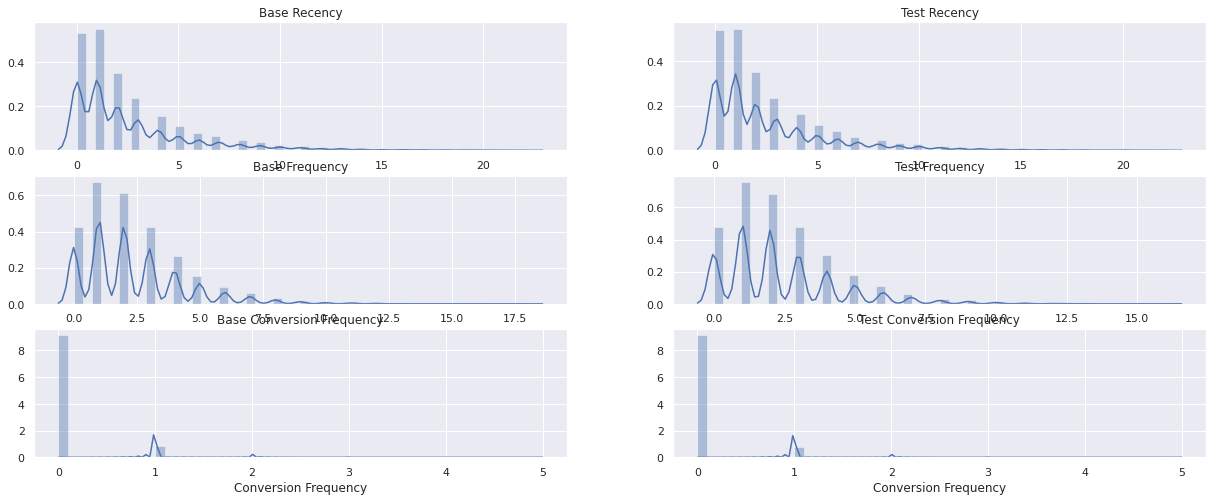

In [ ]:
# Plot RFC (Recency, Frequency, Conversion Frequency) distributions
plt.figure(figsize=(21,8))
# Plot distribution of R
plt.subplot(3, 2, 1); sns.distplot(data_process_base['Recency']).set_title('Base Recency')
# Plot distribution of F
plt.subplot(3, 2, 3); sns.distplot(data_process_base['Frequency']).set_title('Base Frequency')
# Plot distribution of C
plt.subplot(3, 2, 5); sns.distplot(data_process_base['Conversion Frequency']).set_title('Base Conversion Frequency')

# Plot distribution of R
plt.subplot(3, 2, 2); sns.distplot(data_process_test['Recency']).set_title('Test Recency')
# Plot distribution of F
plt.subplot(3, 2, 4); sns.distplot(data_process_test['Frequency']).set_title('Test Frequency')
# Plot distribution of C
plt.subplot(3, 2, 6); sns.distplot(data_process_test['Conversion Frequency']).set_title('Test Conversion Frequency')


# Show the plot
plt.show()

<font color='purple'>Observations from the six plots above: 
* Recency, Frequency and Conversion Frequency plots seem to have similar behavior. Calculations are done below to examine the behavior in more detail. 
* Conversion Frequency is examined later in more detail.

First two days have the highest recency and should be used to build a retargeting schedule
</font>

In [ ]:
data_process_base['Recency'].value_counts(normalize=True)*100

1     24.300927
0     23.413503
2     15.437554
3     10.428137
4      6.911040
5      4.940597
6      3.527963
7      2.796291
8      2.086352
9      1.604607
10     1.130107
11     0.930890
12     0.572298
13     0.550565
14     0.333237
16     0.206462
15     0.206462
17     0.181107
18     0.152130
19     0.105042
20     0.079687
21     0.076065
22     0.028977
Name: Recency, dtype: float64

In [ ]:
data_process_base['Frequency'].value_counts(normalize=True)*100

1     24.286439
2     22.000869
3     15.386844
0     15.296291
4      9.631266
5      5.614315
6      3.299768
7      2.075485
8      1.075775
9      0.604897
10     0.307882
11     0.235439
12     0.108664
13     0.028977
14     0.021733
15     0.010866
16     0.007244
18     0.003622
17     0.003622
Name: Frequency, dtype: float64

In [ ]:
data_process_base['Conversion Frequency'].value_counts(normalize=True)*100

0    90.962764
1     8.287453
2     0.684584
3     0.057954
5     0.003622
4     0.003622
Name: Conversion Frequency, dtype: float64

In [ ]:
data_process_base['Conversion Frequency'].sum()

2723

In [ ]:
(data_process_base['Conversion Frequency'].sum()*100)/262107

1.0388886981271008

In [ ]:
data_process_test['Recency'].value_counts(normalize=True)*100

1     23.932562
0     23.651102
2     15.381801
3     10.363365
4      7.191309
5      4.959329
6      3.706831
7      2.600692
8      2.060289
9      1.522700
10     1.258127
11     0.895043
12     0.593881
13     0.506628
14     0.351825
15     0.250500
16     0.194208
17     0.174505
18     0.118213
20     0.101326
19     0.095696
21     0.047848
22     0.042219
Name: Recency, dtype: float64

In [ ]:
data_process_test['Frequency'].value_counts(normalize=True)*100

1     24.278758
2     21.801908
0     15.339582
3     15.246700
4      9.721636
5      5.716457
6      3.501365
7      1.925188
8      1.044217
9      0.683948
10     0.402488
11     0.188578
12     0.078809
13     0.039404
14     0.014073
15     0.008444
16     0.008444
Name: Frequency, dtype: float64

In [ ]:
data_process_test['Conversion Frequency'].value_counts(normalize=True)*100

0    91.240958
1     8.038504
2     0.658617
3     0.059107
5     0.002815
Name: Conversion Frequency, dtype: float64

In [ ]:
(data_process_test['Conversion Frequency'].sum())*100/337893

1.003868088418523

<font color='purple'>Observations from the calculations above: 
* 47% and 46% of conversions happened in the first two days since the first bid in base and test data respectively
* The highest percentage of the population saw the same ad 6 times on average
* The new ad campaign value counts decreased from 9.04% for baseline to 8.76% test data. The conversions decreased from 1.03% to 1.003% Since the plots showed a general increase in conversions overall, this negative percentage value could be a result in a decrease in a conversions in LA in 18-21 age bracket. 

New Ad campaign had an decrease in conversions in total values due to anomalies.
</font>

In [ ]:
pd.crosstab(data_base['gender'],data_base['conversion'],normalize = 'index')

conversion,0,1
gender,,
F,0.987337,0.012663
M,0.991876,0.008124


In [ ]:
pd.crosstab(data_test['gender'],data_test['conversion'],normalize = 'index')

conversion,0,1
gender,,
F,0.988155,0.011845
M,0.991771,0.008229


In [ ]:
pd.crosstab(data_base['location'],data_base['conversion'],normalize = 'index')

conversion,0,1
location,,
AL,0.998068,0.001932
AR,0.988274,0.011726
FL,0.988813,0.011187
GA,0.988134,0.011866
KY,0.987704,0.012296
LA,0.984930,0.015070
MS,0.997329,0.002671
NC,0.998583,0.001417
SC,0.985581,0.014419


In [ ]:
pd.crosstab(data_test['location'],data_test['conversion'],normalize = 'index')

conversion,0,1
location,,
AL,0.996186,0.003814
AR,0.983758,0.016242
FL,0.985574,0.014426
GA,0.986071,0.013929
KY,0.984690,0.015310
LA,0.984050,0.015950
MS,0.994667,0.005333
NC,0.995777,0.004223
SC,0.984090,0.015910


In [ ]:
pd.crosstab(data_base['age_bins'],data_base['conversion'],normalize = 'index')

conversion,0,1
age_bins,,
"(17, 21]",0.989809,0.010191
"(21, 25]",0.989653,0.010347
"(25, 29]",0.989035,0.010965
"(29, 33]",0.989961,0.010039


In [ ]:
pd.crosstab(data_test['age_bins'],data_test['conversion'],normalize = 'index')

conversion,0,1
age_bins,,
"(17, 21]",0.989586,0.010414
"(21, 25]",0.989691,0.010309
"(25, 29]",0.990264,0.009736
"(29, 33]",0.990307,0.009693


<font color='purple'>Observations from the calculations above: 
* There is a small increase in female conversions in test data 
* All states show higher amount of conversions
* Ages 18-21 had increase in conversions, ages 21-25 stayed the same, all ages above 25 years old had a slight decrease


</font>

In [ ]:
# Concat RFC quartile values to create RFC Segments for Base
def join_RFC(x): return str(x['R']) + str(x['F']) 
data_process_base['RFC_Segment_Concat_Base'] = data_process_base.apply(join_RFC, axis=1)
rfc_base = data_process_base

#select only rows where conversion happened 
rfc_base = rfc_base[rfc_base['Conversion Frequency'] != 0].reset_index(drop=True) 
display(rfc_base.head())

#-----------------------------------------------------------------------------------------

# Concat RFC quartile values to create RFC Segments for Test
def join_RFC(x): return str(x['R']) + str(x['F']) 
data_process_test['RFC_Segment_Concat_Test'] = data_process_test.apply(join_RFC, axis=1)
rfc_test = data_process_test

#select only rows where conversion happened 
rfc_test = rfc_test[rfc_test['Conversion Frequency'] != 0].reset_index(drop=True) 
display(rfc_test.head())

,Recency,Frequency,Conversion Frequency,R,F,RFC_Segment_Concat_Base
0,0,3,1,4,3,43
1,7,2,1,1,2,12
2,5,3,1,1,3,13
3,1,5,1,4,4,44
4,2,1,1,3,1,31


,Recency,Frequency,Conversion Frequency,R,F,RFC_Segment_Concat_Test
0,1,1,1,4,1,41
1,1,5,1,4,4,44
2,3,3,1,2,3,23
3,6,3,1,1,3,13
4,0,6,1,4,4,44


In [ ]:
# Count num of unique segments for Base
rfc_count_unique_base = rfc_base.groupby('RFC_Segment_Concat_Base')['RFC_Segment_Concat_Base'].nunique()
display(rfc_count_unique_base.sum())

# Count num of unique segments for Test
rfc_count_unique_test = rfc_test.groupby('RFC_Segment_Concat_Test')['RFC_Segment_Concat_Test'].nunique()
display(rfc_count_unique_test.sum())

16

16

In [ ]:
# Calculate RF_Score for Base 
rfc_base['RFC_Score'] = rfc_base[['R','F']].sum(axis=1)
display(rfc_base['RFC_Score'].head())

# Calculate RF_Score for Test
rfc_test['RFC_Score'] = rfc_test[['R','F']].sum(axis=1)
display(rfc_test['RFC_Score'].head())

0    7.0
1    3.0
2    4.0
3    8.0
4    4.0
Name: RFC_Score, dtype: float64

0    5.0
1    8.0
2    5.0
3    4.0
4    8.0
Name: RFC_Score, dtype: float64

In [ ]:
# Define RFC_level function
def rfc_level(df):
    if df['RFC_Score'] >= 6:
        return 'High Conversions'
    elif ((df['RFC_Score'] >= 5) and (df['RFC_Score'] < 6)):
        return 'Medium Conversions'
    elif ((df['RFC_Score'] >= 4) and (df['RFC_Score'] < 5)):
        return 'Lower Conversions'
    elif ((df['RFC_Score'] >= 3) and (df['RFC_Score'] < 4)):
        return 'Need Slight Retargeting Modification'
    elif ((df['RFC_Score'] >= 2) and (df['RFC_Score'] < 3)):
        return 'Need Medium Retargeting Modification'
    elif ((df['RFC_Score'] >= 1) and (df['RFC_Score'] < 2)):
        return 'Need High Retargeting Modification'
    else: 
        return 'Require Activation'

# Create a new variable RFC_Level in Base
rfc_base['RFC_Level'] = rfc_base.apply(rfc_level, axis=1)
# Print the header with top 5 rows to the console
display(rfc_base.head())

# Create a new variable RFC_Level in Test
rfc_test['RFC_Level'] = rfc_test.apply(rfc_level, axis=1)
# Print the header with top 5 rows to the console
display(rfc_test.head())

,Recency,Frequency,Conversion Frequency,R,F,RFC_Segment_Concat_Base,RFC_Score,RFC_Level
0,0,3,1,4,3,43,7.0,High Conversions
1,7,2,1,1,2,12,3.0,Need Slight Retargeting Modification
2,5,3,1,1,3,13,4.0,Lower Conversions
3,1,5,1,4,4,44,8.0,High Conversions
4,2,1,1,3,1,31,4.0,Lower Conversions


,Recency,Frequency,Conversion Frequency,R,F,RFC_Segment_Concat_Test,RFC_Score,RFC_Level
0,1,1,1,4,1,41,5.0,Medium Conversions
1,1,5,1,4,4,44,8.0,High Conversions
2,3,3,1,2,3,23,5.0,Medium Conversions
3,6,3,1,1,3,13,4.0,Lower Conversions
4,0,6,1,4,4,44,8.0,High Conversions


In [ ]:
# Calculate average values for each RFC_Level, and return a size of each segment for Base 
rfc_level_agg_base = rfc_base.groupby('RFC_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Conversion Frequency': 'mean',
}).round(1)
# Print the aggregated dataset
display(rfc_level_agg_base)

#---------------------------------------------------------------------------------

# Calculate average values for each RFC_Level, and return a size of each segment for Test
rfc_level_agg_test = rfc_test.groupby('RFC_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Conversion Frequency': 'mean',
}).round(1)
# Print the aggregated dataset
display(rfc_level_agg_test)

,Recency,Frequency,Conversion Frequency
RFC_Level,,,
High Conversions,0.9,4.8,1.1
Lower Conversions,4.3,2.1,1.0
Medium Conversions,2.8,2.5,1.1
Need Medium Retargeting Modification,8.2,1.0,1.0
Need Slight Retargeting Modification,6.0,1.7,1.0


,Recency,Frequency,Conversion Frequency
RFC_Level,,,
High Conversions,0.9,4.8,1.1
Lower Conversions,4.3,2.1,1.0
Medium Conversions,2.8,2.5,1.1
Need Medium Retargeting Modification,7.8,1.0,1.0
Need Slight Retargeting Modification,5.8,1.6,1.0


<font color='purple'>Observations from the two plots below: 
* New ad campaign increase conversion from medium conversion rate customers to high conversion rate customers. 

Further investigation on time and ROI should be done to see how to increase conversion rate for all groups.
</font>

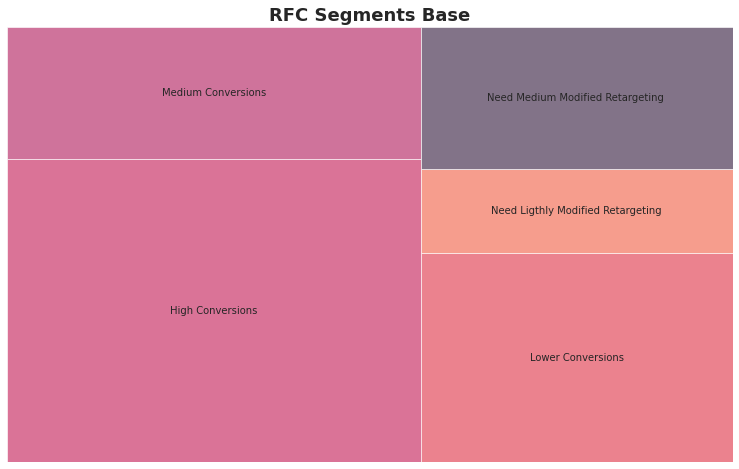

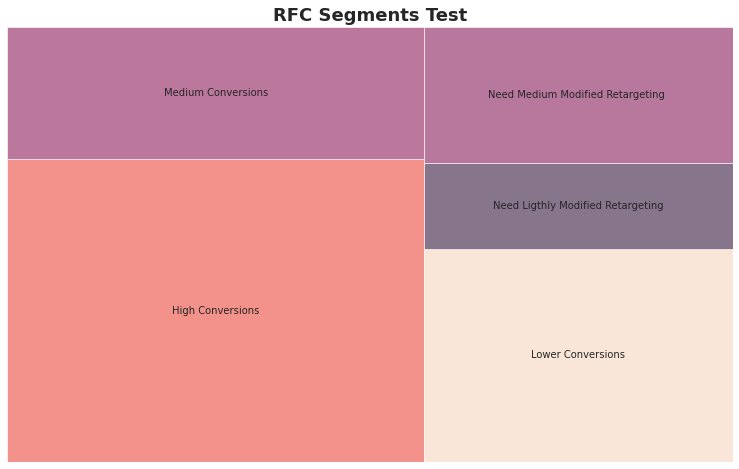

In [ ]:
# A tree plot for Base

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
squarify.plot(sizes=rfc_level_agg_base['Frequency'], 
              label=['High Conversions',
                     'Medium Conversions',
                     'Lower Conversions',
                     'Need Ligthly Modified Retargeting',
                     'Need Medium Modified Retargeting ', 
                     'Need Highly Modified Retargeting', 
                     'Require Activation'], alpha=.6 )
plt.title("RFC Segments Base",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# A tree plot for Test

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
squarify.plot(sizes=rfc_level_agg_test['Frequency'], 
              label=['High Conversions',
                     'Medium Conversions',
                     'Lower Conversions',
                     'Need Ligthly Modified Retargeting',
                     'Need Medium Modified Retargeting ', 
                     'Need Highly Modified Retargeting', 
                     'Require Activation'], alpha=.6 )
plt.title("RFC Segments Test",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()




<font color='purple'>Checking the conversion rate for New Ad and Base.
* Conversion rate seems to be very small. A desired rate is usually 0.02. In this case it is 0.00035

This is a first sign that new design should not be considered. Further A/B testing can show whether it is true.
</font>

In [ ]:
ab_summary = data.pivot_table(values='conversion', index='test', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = data.pivot_table(values='conversion', index='test', aggfunc=lambda x: len(x))
ab_summary['rate'] = data.pivot_table(values='conversion', index='test')

display(ab_summary)

,conversion,total,rate
test,,,
0,2723,262107,0.010389
1,3392,337893,0.010039


In [ ]:
test_results = data[data.test == 1].conversion
base_results = data[data.test == 0].conversion

hist_data = [test_results, base_results]

group_labels = ['test', 'control']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5,
                         curve_type='normal',show_rug=False)

fig.layout = go.Layout(
        title='Test vs Control',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )


# Plot!
pyoff.iplot(fig)

<font color='purple'>Checking the density plot for test and base groups.
* There seems to be a slight difference between two groups
* Check further below via scipy
</font>

In [ ]:
from scipy import stats 
test_result = stats.ttest_ind(test_results, base_results)
print(test_result)

Ttest_indResult(statistic=-1.3396111452321071, pvalue=0.18037230587087172)


<font color='purple'> Null Hypothesis: no significant difference between test and base group.
* t-statistic respresents the difference between averages of test and base group in units of standard error. Higher t-statistic value means bigger difference. 
* p-value measures the probability of the null hypothesis to be true. If it is < 5%, the result here is statistically significant. Check if the result is significant below. 
</font>

In [ ]:
def eval_test(test_results,base_results):
    test_result = stats.ttest_ind(test_results, base_results)
    if test_result[1] < 0.05:
        print('result is significant')
    else:
        print('result is not significant')

eval_test(test_results, base_results)

result is not significant


<font color='purple'> The result is not statistically significant since there are two large groups with many variables. Break the data by state and test the significance again. 
</font>

##<font color='purple'>5. Additional tests to check if New Ad campaigne was significant in each state </font>


##<font color='purple'>-----------------------------------------------------------------------------------------------------------------------------------------</font>

In [ ]:
data.location.unique()

array(['FL', 'AL', 'AR', 'SC', 'GA', 'TN', 'LA', 'VA', 'MS', 'NC', 'KY'],
      dtype=object)

In [ ]:
# Louisiana LA
test_resultsLA = data_test[data_test.location == 'LA'].conversion
base_resultsLA = data_base[data_base.location == 'LA'].conversion

test_result = stats.ttest_ind(test_resultsLA, base_resultsLA)
print(test_result)

eval_test(test_resultsLA, base_resultsLA)

Ttest_indResult(statistic=0.8228471743507372, pvalue=0.4105985649336743)
result is not significant


In [ ]:
# Florida FL
test_resultsFL = data_test[data_test.location == 'FL'].conversion
base_resultsFL = data_base[data_base.location == 'FL'].conversion

test_result = stats.ttest_ind(test_resultsFL, base_resultsFL)
print(test_result)

eval_test(test_resultsFL, base_resultsFL)

Ttest_indResult(statistic=3.348938357294992, pvalue=0.0008117745082181252)
result is significant


In [ ]:
# Alabama AL

test_resultsAL = data_test[data_test.location == 'AL'].conversion
base_resultsAL = data_base[data_base.location == 'AL'].conversion

test_result = stats.ttest_ind(test_resultsAL, base_resultsAL)
print(test_result)

eval_test(test_resultsAL, base_resultsAL)

Ttest_indResult(statistic=3.2817698570101346, pvalue=0.0010322213514122667)
result is significant


In [ ]:
# Arizona AR

test_resultsAR = data_test[data_test.location == 'AR'].conversion
base_resultsAR = data_base[data_base.location == 'AR'].conversion

test_result = stats.ttest_ind(test_resultsAR, base_resultsAR)
print(test_result)

eval_test(test_resultsAR, base_resultsAR)

Ttest_indResult(statistic=4.526796105066885, pvalue=6.0009796550472545e-06)
result is significant


In [ ]:
# South Carolina SC

test_resultsSC = data_test[data_test.location == 'SC'].conversion
base_resultsSC = data_base[data_base.location == 'SC'].conversion

test_result = stats.ttest_ind(test_resultsSC, base_resultsSC)
print(test_result)

eval_test(test_resultsSC, base_resultsSC)

Ttest_indResult(statistic=1.4269175712124162, pvalue=0.1536093302008702)
result is not significant


In [ ]:
# Georgia

test_resultsGA = data_test[data_test.location == 'GA'].conversion
base_resultsGA = data_base[data_base.location == 'GA'].conversion

test_result = stats.ttest_ind(test_resultsGA, base_resultsGA)
print(test_result)

eval_test(test_resultsGA, base_resultsGA)

Ttest_indResult(statistic=2.1187602387556117, pvalue=0.03411531935450517)
result is significant


In [ ]:
# Tennessi TN

test_resultsTN = data_test[data_test.location == 'TN'].conversion
base_resultsTN = data_base[data_base.location == 'TN'].conversion

test_result = stats.ttest_ind(test_resultsTN, base_resultsTN)
print(test_result)

eval_test(test_resultsTN, base_resultsTN)

Ttest_indResult(statistic=5.075078688309808, pvalue=3.885912186799197e-07)
result is significant


In [ ]:
# Virginia VA

test_resultsVA = data_test[data_test.location == 'VA'].conversion
base_resultsVA = data_base[data_base.location == 'VA'].conversion

test_result = stats.ttest_ind(test_resultsVA, base_resultsVA)
print(test_result)

eval_test(test_resultsVA, base_resultsVA)

Ttest_indResult(statistic=2.1239005610936794, pvalue=0.033682972075262954)
result is significant


In [ ]:
# Massachusets MS
test_resultsMS = data_test[data_test.location == 'MS'].conversion
base_resultsMS = data_base[data_base.location == 'MS'].conversion

test_result = stats.ttest_ind(test_resultsMS, base_resultsMS)
print(test_result)

eval_test(test_resultsMS, base_resultsMS)

Ttest_indResult(statistic=3.9732226564448756, pvalue=7.09984203098283e-05)
result is significant


In [ ]:
# North Carolina NC

test_resultsNC = data_test[data_test.location == 'NC'].conversion
base_resultsNC = data_base[data_base.location == 'NC'].conversion

test_result = stats.ttest_ind(test_resultsNC, base_resultsNC)
print(test_result)

eval_test(test_resultsNC, base_resultsNC)

Ttest_indResult(statistic=4.867593621556607, pvalue=1.132774055215126e-06)
result is significant


In [ ]:
# Kentuky KY

test_resultsKY = data_test[data_test.location == 'KY'].conversion
base_resultsKY = data_base[data_base.location == 'KY'].conversion

test_result = stats.ttest_ind(test_resultsKY, base_resultsKY)
print(test_result)

eval_test(test_resultsKY, base_resultsKY)

Ttest_indResult(statistic=3.0385253771500693, pvalue=0.0023785016343184306)
result is significant


<font color='purple'> The result shows that the results were significant in all states except Lousiana and South Carolina. Lets do ANOVA on these results. 
</font>

In [ ]:
data.location.unique()

array(['FL', 'AL', 'AR', 'SC', 'GA', 'TN', 'LA', 'VA', 'MS', 'NC', 'KY'],
      dtype=object)

In [ ]:
def one_anova_test(base, test): 
  test_result = stats.f_oneway(base, test)
  if test_result[1] < 0.05:
    print('result is significant')
  else:
    print('result is not significant')



In [ ]:
# Florida
one_anova_test(test_resultsFL, base_resultsFL)

result is significant


In [ ]:
# Alabama
one_anova_test(test_resultsAL, base_resultsAL)

result is significant


In [ ]:
# Arizona 
one_anova_test(test_resultsAR, base_resultsAR)

result is significant


In [ ]:
# South Carolina 
one_anova_test(test_resultsSC, base_resultsSC)

result is not significant


In [ ]:
# Georgia
one_anova_test(test_resultsGA, base_resultsGA)

result is significant


In [ ]:
# Tennessi
one_anova_test(test_resultsTN, base_resultsTN)

result is significant


In [ ]:
# Louisiana
one_anova_test(test_resultsLA, base_resultsLA)

result is not significant


In [ ]:
# Virginia
one_anova_test(test_resultsVA, base_resultsVA)

result is significant


In [ ]:
# Massachussets
one_anova_test(test_resultsMS, base_resultsMS)

result is significant


In [ ]:
# North Carolina
one_anova_test(test_resultsNC, base_resultsNC)

result is significant


In [ ]:
# Kentuky
one_anova_test(test_resultsKY, base_resultsKY)

result is significant


##<font color=purple> 6. Modeling

</font>

<font color = purple> To build model which will predict conversions in retargeting, we need to construct additional features. If bids >= 2 and conversions >= 2, the retargeting campaign is successful. If bids >=2 and conversions are <1, retargeting campaign is not successful. Everything else should be dropped. After the model is trained on the data, it could run on the rest of the data. 
The problem with this approach is when the models will see the bids <=1, it probably will classify retargeting success of none since it increases as win rate increases. 
Lets check for ourselves.

In [ ]:
#Build retargeting success column 
#tdtm = total_data_test[total_data_test['Conversion Frequency'] > 1].reset_index(drop=True)
total_data_test.head(5)
#total_data_test['Retargeting success'] = total_data_test[total_data_test['Frequency'] > 1] .reset_index(drop=True)
total_data_test['Retargeting Success'] = np.where(total_data_test['Conversion Frequency'] > 1, 1, 0)
total_data_test['Retargeted'] = np.where(total_data_test['Frequency']>1, 1, 0)
display(total_data_test.head(5))
tdtm = total_data_test
tdtm.shape


,user_id,age,gender,location,test,timestamp,bid,win,conversion,age_bins,Recency,Frequency,Conversion Frequency,Retargeting Success,Retargeted
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-01 13:43:34,1,0,0,"(29, 33]",6,4,0,0,1
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 03:59:18,0,0,0,"(29, 33]",6,4,0,0,1
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 17:41:50,1,1,0,"(29, 33]",6,4,0,0,1
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-07 04:02:42,1,1,0,"(29, 33]",6,4,0,0,1
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-08 09:05:01,1,0,0,"(29, 33]",6,4,0,0,1


(337893, 15)

<font color = purple>Some feature engineering. Lets check how many people were actually retargeted</font>

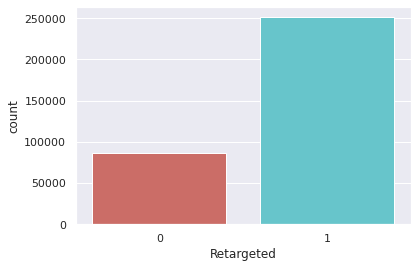

In [ ]:
sns.countplot(x='Retargeted',data=tdtm, palette='hls')
plt.show();

<font color = purple> Lets focus on people who were retargeted only and see how many of them converted. Highly unbalanced dataset. Tried XGBoost and Weighted XGBoost with poor results. Will proceed with over and undersampling combined with Random Forest. 

,user_id,age,gender,location,test,timestamp,bid,win,conversion,age_bins,Recency,Frequency,Conversion Frequency,Retargeting Success,Retargeted
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-01 13:43:34,1,0,0,"(29, 33]",6,4,0,0,1
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 03:59:18,0,0,0,"(29, 33]",6,4,0,0,1
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 17:41:50,1,1,0,"(29, 33]",6,4,0,0,1
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-07 04:02:42,1,1,0,"(29, 33]",6,4,0,0,1
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-08 09:05:01,1,0,0,"(29, 33]",6,4,0,0,1


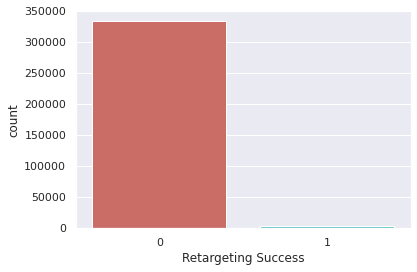

In [ ]:
tdtm_retargeted = tdtm[tdtm['Retargeted'] >= 1].reset_index(drop=True)
display(tdtm_retargeted.head(5))
sns.countplot(x='Retargeting Success',data=tdtm, palette='hls')
plt.show();

In [ ]:

tdtm_retargeted['Retargeting Success'].value_counts(normalize=True)

0    0.983038
1    0.016962
Name: Retargeting Success, dtype: float64

In [ ]:
tdtm_retargeted['Retargeting Success'].value_counts()

0    246999
1      4262
Name: Retargeting Success, dtype: int64

<font color=purple> Value counts confirm that dataset is highly unbalanced. There is no methods that can process datasets with such high imbalance. Butlest try just for fun. Lets explode the timestamp into weeks, days, hours, minutes and seconds and investigate how retargeting success rate changes with time. 

,user_id,age,gender,location,test,timestamp,bid,win,conversion,age_bins,Recency,Frequency,Conversion Frequency,Retargeting Success,Retargeted,Week,Day,Hour,Minute,Second
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-01 13:43:34,1,0,0,"(29, 33]",6,4,0,0,1,52,1,13,43,34
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 03:59:18,0,0,0,"(29, 33]",6,4,0,0,1,1,4,3,59,18
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-04 17:41:50,1,1,0,"(29, 33]",6,4,0,0,1,1,4,17,41,50
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-07 04:02:42,1,1,0,"(29, 33]",6,4,0,0,1,1,7,4,2,42
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,2017-01-08 09:05:01,1,0,0,"(29, 33]",6,4,0,0,1,1,8,9,5,1


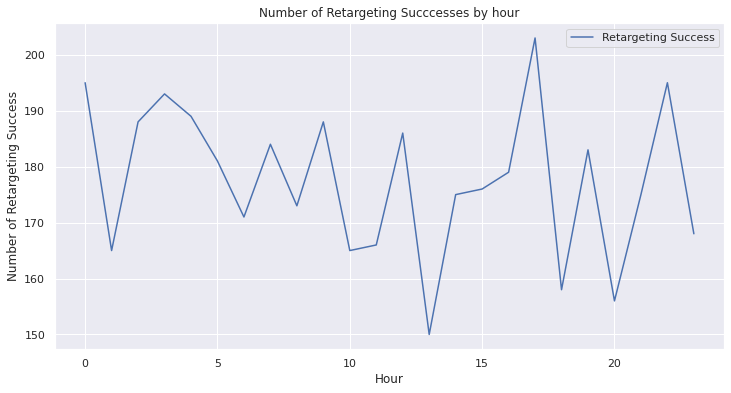

In [ ]:
tdtm_retargeted['Week']=tdtm_retargeted['timestamp'].dt.week
tdtm_retargeted['Day']=tdtm_retargeted['timestamp'].dt.day
tdtm_retargeted['Hour']=tdtm_retargeted['timestamp'].dt.hour
tdtm_retargeted['Minute']=tdtm_retargeted['timestamp'].dt.minute
tdtm_retargeted['Second']=tdtm_retargeted['timestamp'].dt.second
display(tdtm_retargeted.head(5))

tdtm_retargeted.groupby('Hour').agg({'Retargeting Success':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of Retargeting Success')
plt.title('Number of Retargeting Succcesses by hour');


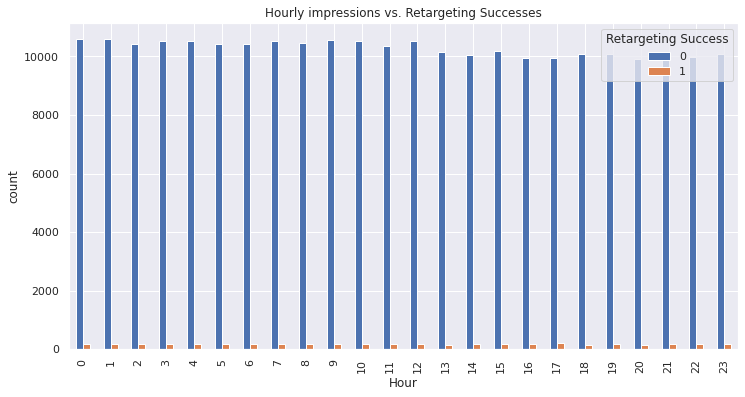

In [ ]:
tdtm_retargeted.groupby(['Hour', 'Retargeting Success']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. Retargeting Successes');

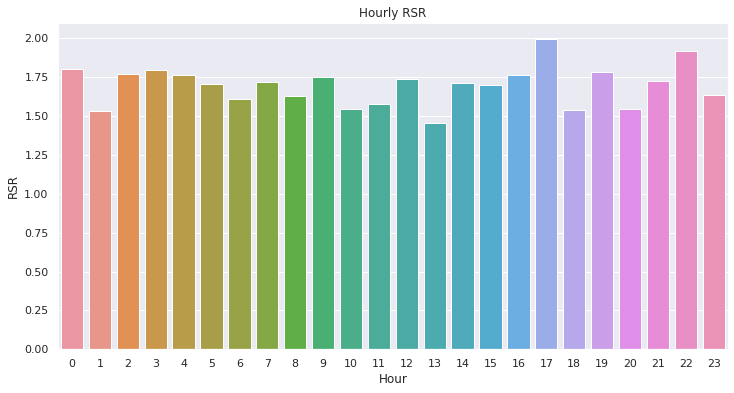

In [ ]:
# Rate of retargeting successes per hour per each ad

df_retsuc = tdtm_retargeted[tdtm_retargeted['Retargeting Success'] == 1]
df_hour = tdtm_retargeted[['Hour','Retargeting Success']].groupby(['Hour']).count().reset_index()
df_hour = df_hour.rename(columns={'Retargeting Success': 'impressions'})
df_hour['Retargeting Success'] = df_retsuc[['Hour','Retargeting Success']].groupby(['Hour']).count().reset_index()['Retargeting Success']
df_hour['RSR'] = df_hour['Retargeting Success']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='RSR', x='Hour', data=df_hour)
plt.title('Hourly RSR');

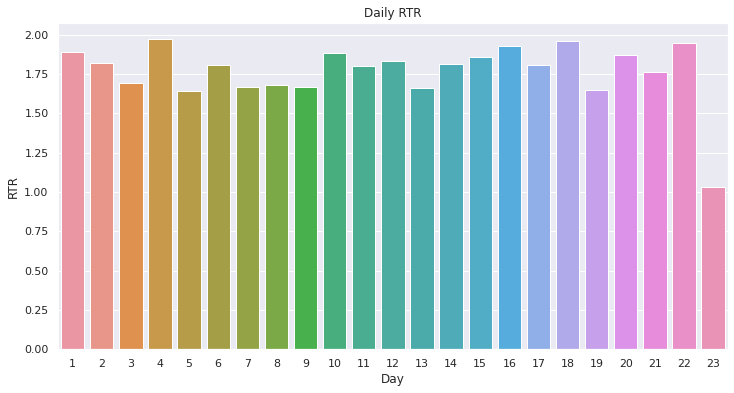

In [ ]:
# Rate of retarget successes per day per each ad

df_retsuc = tdtm_retargeted[tdtm_retargeted['Retargeting Success'] == 1]
df_day = tdtm_retargeted[['Day','Retargeting Success']].groupby(['Day']).count().reset_index()
df_day = df_day.rename(columns={'Retargeting Success': 'impressions'})
df_day['Retargeting Success'] = df_retsuc[['Day','Retargeting Success']].groupby(['Day']).count().reset_index()['Retargeting Success']
df_day['RTR'] = df_day['Retargeting Success']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='RTR', x='Day', data=df_day)
plt.title('Daily RTR');

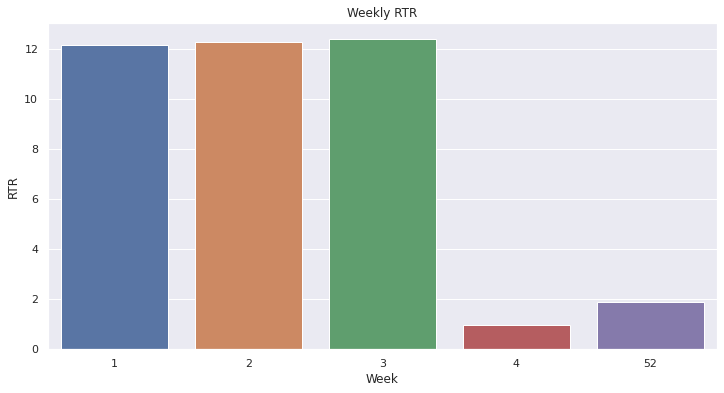

In [ ]:
# Rate of retarget successes per week per each ad

df_retsuc = tdtm_retargeted[tdtm_retargeted['Retargeting Success'] == 1]
df_week = tdtm_retargeted[['Week','Retargeting Success']].groupby(['Week']).count().reset_index()
df_week = df_week.rename(columns={'Retargeting Success': 'impressions'})
df_week['Retargeting Success'] = df_retsuc[['Week','Retargeting Success']].groupby(['Week']).count().reset_index()['Retargeting Success']
df_week['RTR'] = df_week['Retargeting Success']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='RTR', x='Week', data=df_week)
plt.title('Weekly RTR');

In [ ]:
# Drop excessive data to eliminate noise and bias.
tdtm_retargeted = tdtm_retargeted.drop(columns=['timestamp', 'age_bins','Recency','Frequency','Conversion Frequency','Retargeted'])
display(tdtm_retargeted.head(5))

,user_id,age,gender,location,test,bid,win,conversion,Retargeting Success,Week,Day,Hour,Minute,Second
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,0,0,0,52,1,13,43,34
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,0,0,0,0,1,4,3,59,18
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,1,0,0,1,4,17,41,50
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,1,0,0,1,7,4,2,42
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,0,0,0,1,8,9,5,1


In [ ]:
tdtm_retargeted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251261 entries, 0 to 251260
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              251261 non-null  object
 1   age                  251261 non-null  int64 
 2   gender               251261 non-null  object
 3   location             251261 non-null  object
 4   test                 251261 non-null  int64 
 5   bid                  251261 non-null  int64 
 6   win                  251261 non-null  int64 
 7   conversion           251261 non-null  int64 
 8   Retargeting Success  251261 non-null  int64 
 9   Week                 251261 non-null  int64 
 10  Day                  251261 non-null  int64 
 11  Hour                 251261 non-null  int64 
 12  Minute               251261 non-null  int64 
 13  Second               251261 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 26.8+ MB


<font color = purple> The approach to modeling will be the following:  train and test the model on retargeted people, then run this model on untargeted people and predict their target success. This is not the best approach since retargeting is sensitive to recency and frequency. 
* The best solution would be run time series to predict retargeting success, then optimize retargeting per wins and look at financial data to check the costs. Maybe try transfer learning as new data is coming in. Meanwhile this approach could serve as a well-educated guess.</font>

In [ ]:
#To prevent RAM from crushing, use a random sample
train = tdtm_retargeted.sample(n=5000, random_state=2)
# Define X and Y variables 
X = train.drop('Retargeting Success', axis =1)
Y = train[['Retargeting Success']]

#Convert categorical variables to dummy variables. Use drop first to reduce the amount of columns and increase computation time
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =7)

In [ ]:
print(train['Retargeting Success'].value_counts())
4909/91

0    4909
1      91
Name: Retargeting Success, dtype: int64


53.94505494505494

<font color = purple> The training dataset is highly imbalanced as well. 

In [ ]:
# define model
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)




In [ ]:
#summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.671


<font color=purple>The result is not good - it is just slightly better than tossing a coin. Lets do some tuning, SMOTE, undersampling and data scaling. </font>

In [ ]:
model = RandomForestClassifier(random_state=2)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.600


<font color=purple> Mean ROC AUC went down with SMOTE and undersampling. Lets try to remove df.sample and see if the model still runs with Random Forest and if the results get any better. 

In [ ]:
X = train.drop('Retargeting Success', axis =1)
Y = train[['Retargeting Success']]

#Convert categorical variables to dummy variables. Use drop first to reduce the amount of columns and increase computation time
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =7)

model = RandomForestClassifier(random_state=2)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.598


<font color=purple> The result is still not good. Last attempt using Logistic 
Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

X = train.drop('Retargeting Success', axis =1)
Y = train[['Retargeting Success']]

#Convert categorical variables to dummy variables. Use drop first to reduce the amount of columns and increase computation time
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =7)

logreg = LogisticRegression(random_state=2)
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.542


<font color=purple> The result is still not good. Need to play with different options for the sampling strategy and Gridsearch to tune hyperparameters for the models. Could experiment with data normalization and scaling. Also, anomaly detection could work better. All these things are beyong the scope of this assignment. 
Lets do model evaluation. 

Training Accuracy 0.9808571428571429

Testing Accuracy 0.9846666666666667

Confusion Matrix


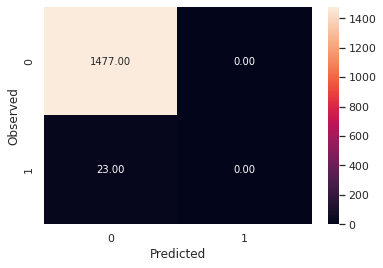

None

Recall 0.0

Precision 0.0
F1 Score 0.0

Roc Auc Score 0.5


In [ ]:
logreg.fit(X_train, y_train)

y_predict = logreg.predict(X_test)

result = X_test.copy()
result['Observed conversions'] = y_test
result['Predicted conversions'] = y_predict

def draw_cm (actual, predicted):
  cm = confusion_matrix(actual,predicted)
  sns.heatmap(cm, annot=True, fmt = '.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

print('Training Accuracy', logreg.score(X_train,y_train))
print()
print('Testing Accuracy', logreg.score(X_test,y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test, y_predict))
print()
print('Recall',recall_score(y_test,y_predict))
print()
print('Precision',precision_score(y_test,y_predict))
print('F1 Score',f1_score(y_test,y_predict))
print()
print('Roc Auc Score',roc_auc_score(y_test,y_predict))

<font color = purple> XGBoost, Random Forest and Logistic Regression show the same results - they fail to detect observed retargeting. 
This problem would require more tuning, which is out of the scope of this assignment. 
 </font>


<font color = purple> Lets try anomaly detection

In [ ]:
from sklearn.ensemble import IsolationForest


model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(tdtm_retargeted[['Retargeting Success']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
tdtm_retargeted['scores']=model.decision_function(tdtm_retargeted[['Retargeting Success']])
tdtm_retargeted['anomaly']=model.predict(tdtm_retargeted[['Retargeting Success']])
tdtm_retargeted.head(20)

,user_id,age,gender,location,test,bid,win,conversion,Retargeting Success,Week,Day,Hour,Minute,Second,scores,anomaly
0,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,0,0,0,52,1,13,43,34,0.0,1
1,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,0,0,0,0,1,4,3,59,18,0.0,1
2,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,1,0,0,1,4,17,41,50,0.0,1
3,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,1,0,0,1,7,4,2,42,0.0,1
4,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,0,0,0,1,8,9,5,1,0.0,1
5,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,0,0,0,2,10,23,2,32,0.0,1
6,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,0,0,0,0,2,13,6,21,40,0.0,1
7,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,0,0,0,0,2,13,22,40,11,0.0,1
8,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,1,0,0,2,15,9,46,48,0.0,1
9,00003e3b9e5336685200ae85d21b4f5e,33,F,FL,1,1,1,0,0,3,17,2,53,55,0.0,1


In [ ]:
anomaly=tdtm_retargeted.loc[tdtm_retargeted['anomaly']==-1]
anomaly_index=list(anomaly.index)
display(anomaly)

,user_id,age,gender,location,test,bid,win,conversion,Retargeting Success,Week,Day,Hour,Minute,Second,scores,anomaly
1236,015e31933548461020e2ba448e85995e,22,M,KY,1,0,0,0,1,52,1,12,55,1,-0.350388,-1
1237,015e31933548461020e2ba448e85995e,22,M,KY,1,1,0,0,1,52,1,17,26,3,-0.350388,-1
1238,015e31933548461020e2ba448e85995e,22,M,KY,1,0,0,0,1,1,3,3,43,47,-0.350388,-1
1239,015e31933548461020e2ba448e85995e,22,M,KY,1,0,0,0,1,1,4,5,16,55,-0.350388,-1
1240,015e31933548461020e2ba448e85995e,22,M,KY,1,1,0,0,1,1,4,6,13,3,-0.350388,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250273,fee63dbf9ecae028b17151670b5945ff,18,F,GA,1,1,1,0,1,3,21,1,49,22,-0.350388,-1
250274,fee63dbf9ecae028b17151670b5945ff,18,F,GA,1,1,0,0,1,3,21,20,17,31,-0.350388,-1
250275,fee63dbf9ecae028b17151670b5945ff,18,F,GA,1,1,1,0,1,3,22,7,49,59,-0.350388,-1
250276,fee63dbf9ecae028b17151670b5945ff,18,F,GA,1,0,0,0,1,4,23,9,14,23,-0.350388,-1


<font color= purple> Anomaly detetection works better. But I still do not know how to apply it on people who in fact were not retargeted. So I STILL DO NOT KNOW IF RETARGETING WOULD BE A SUCCESS AND IF PERFORMANCE WOULD IMPROVE. 

In [ ]:
outliers_counter = len(tdtm_retargeted[tdtm_retargeted['Retargeting Success'] > 0])
outliers_counter

4262

In [ ]:
print("Accuracy percentage:", 100*list(tdtm_retargeted['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 100.0
